In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [136]:
#Reading data from user
# print("Please enter the appropriate value for the below features.")
# user_ip=[]
# for col in x.columns:
#      val = float(input(f"{col}"))
#      user_ip.append(val)

# data = pd.DataFrame([user_ip],columns=x.columns)


#Reading data from .csv file
data = pd.read_csv('housing.csv')

In [137]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [138]:
data.dropna(inplace=True)

In [139]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

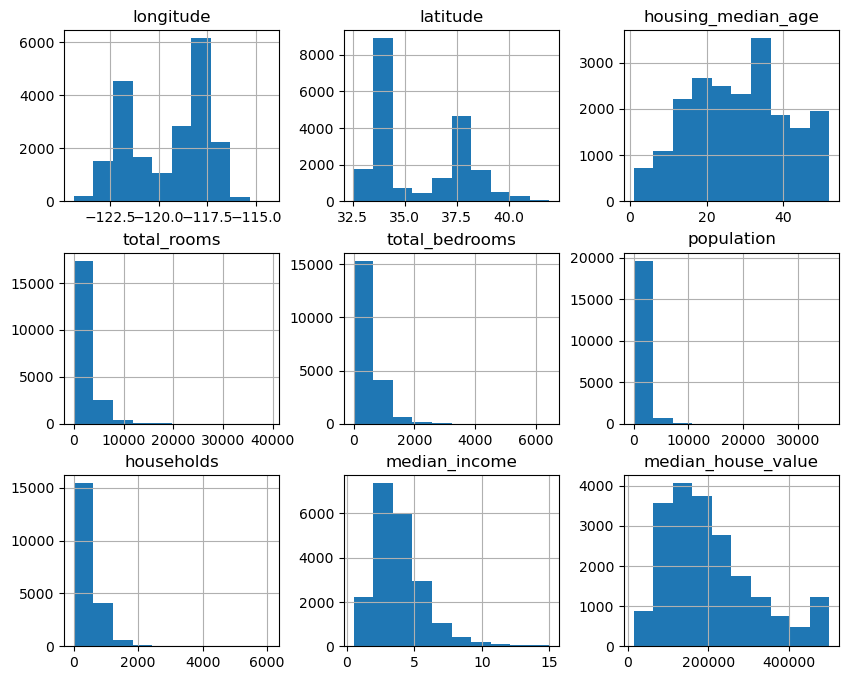

In [140]:
data.hist(figsize=(10,8))

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

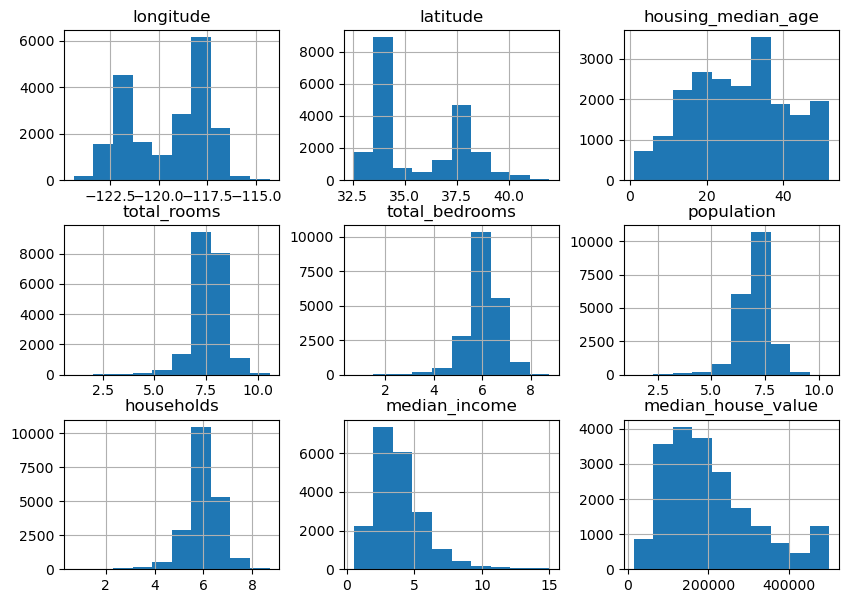

In [141]:
data['total_rooms']=np.log(data['total_rooms'] + 1)
data['total_bedrooms']=np.log(data['total_bedrooms'] + 1)
data['population']=np.log(data['population'] + 1)
data['households']=np.log(data['households'] + 1)

data.hist(figsize=(10,7))

In [142]:
data.ocean_proximity.value_counts()

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

In [143]:
data = data.join(pd.get_dummies(data.ocean_proximity)).drop('ocean_proximity', axis=1)

In [144]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,6.781058,4.867534,5.777652,4.844187,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,8.867850,7.009409,7.784057,7.037906,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,7.291656,5.252273,6.208590,5.181784,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,7.150701,5.463832,6.326149,5.393628,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,7.395108,5.638355,6.338594,5.560682,3.8462,342200.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,7.418181,5.926926,6.740519,5.802118,1.5603,78100.0,0,1,0,0,0
20636,-121.21,39.49,18.0,6.548219,5.017280,5.877736,4.744932,2.5568,77100.0,0,1,0,0,0
20637,-121.22,39.43,17.0,7.720905,6.186209,6.915723,6.073045,1.7000,92300.0,0,1,0,0,0
20638,-121.32,39.43,18.0,7.528869,6.016157,6.609349,5.857933,1.8672,84700.0,0,1,0,0,0


In [145]:
data.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
longitude,1.000000,-0.924616,-0.109357,0.029967,0.060817,0.109259,0.055823,-0.015550,-0.045398,0.320831,-0.055337,0.009501,-0.474714,0.046185
latitude,-0.924616,1.000000,0.011899,-0.032552,-0.068248,-0.136543,-0.088207,-0.079626,-0.144638,-0.446928,0.351084,-0.016662,0.358785,-0.161342
housing_median_age,-0.109357,0.011899,1.000000,-0.313918,-0.272112,-0.243011,-0.241630,-0.118278,0.106432,0.045553,-0.236968,0.017105,0.256149,0.020797
total_rooms,0.029967,-0.032552,-0.313918,1.000000,0.945865,0.864580,0.931700,0.205800,0.158506,0.020809,-0.012862,-0.007567,-0.016499,0.002862
total_bedrooms,0.060817,-0.068248,-0.272112,0.945865,1.000000,0.897523,0.974593,-0.025575,0.053311,0.041725,-0.044914,-0.001902,-0.016793,0.016429
population,0.109259,-0.136543,-0.243011,0.864580,0.897523,1.000000,0.932190,-0.004850,-0.021904,0.115020,-0.071775,-0.012866,-0.059377,-0.014457
households,0.055823,-0.088207,-0.241630,0.931700,0.974593,0.932190,1.000000,0.003918,0.072765,0.072391,-0.087137,-0.009222,-0.005827,0.019715
median_income,-0.015550,-0.079626,-0.118278,0.205800,-0.025575,-0.004850,0.003918,1.000000,0.688355,0.168715,-0.237536,-0.009281,0.056677,0.027351
median_house_value,-0.045398,-0.144638,0.106432,0.158506,0.053311,-0.021904,0.072765,0.688355,1.000000,0.257614,-0.484787,0.023525,0.160526,0.140378
<1H OCEAN,0.320831,-0.446928,0.045553,0.020809,0.041725,0.115020,0.072391,0.168715,0.257614,1.000000,-0.607778,-0.013928,-0.314721,-0.342018


<Axes: >

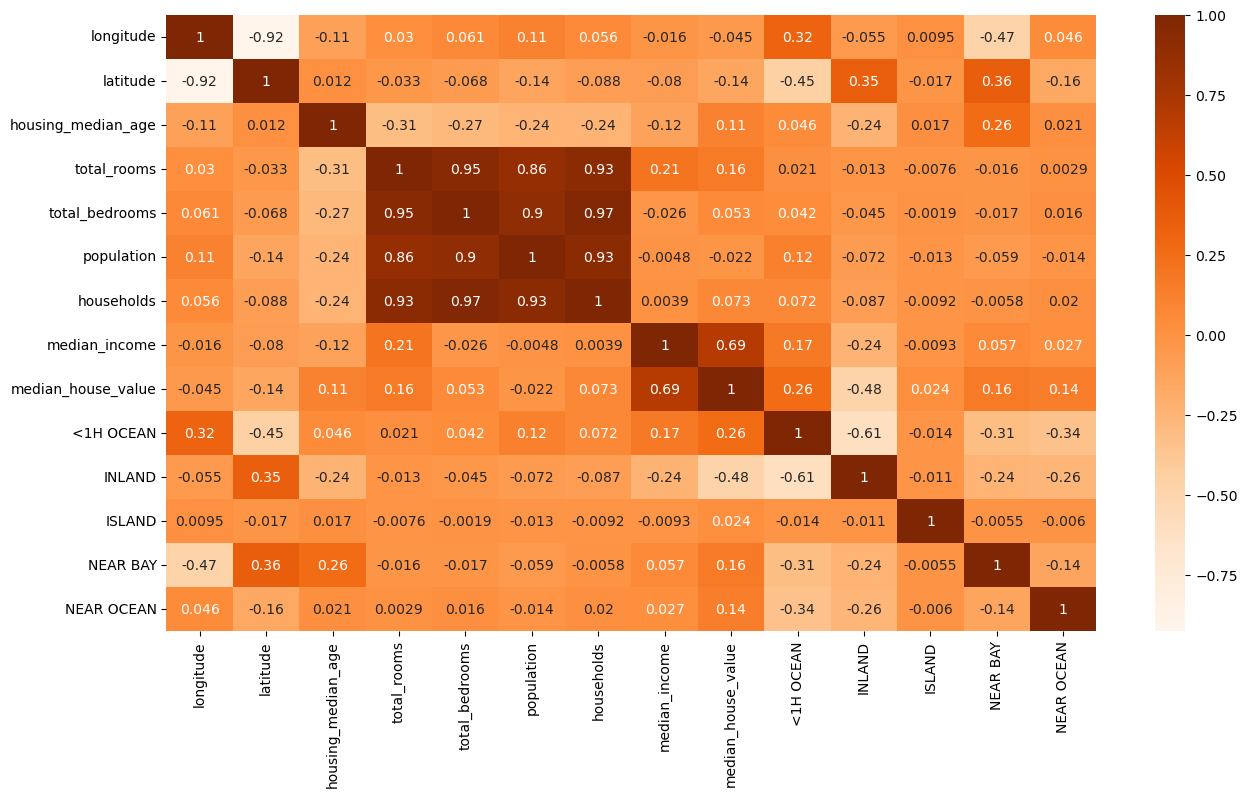

In [146]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), annot=True, cmap="Oranges")

<Axes: xlabel='latitude', ylabel='longitude'>

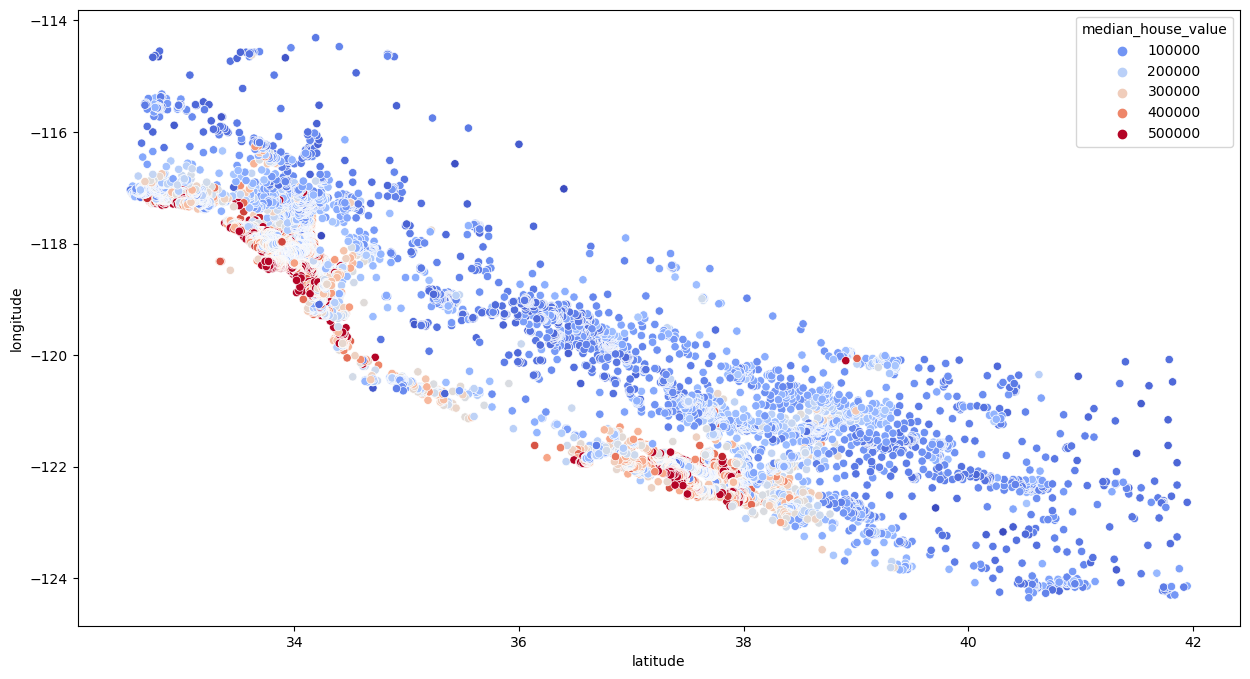

In [147]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude", y="longitude", hue="median_house_value", data=data, palette="coolwarm")

In [148]:
data['bedroom_ratio']=data['total_bedrooms'] / data['total_rooms']
data['household_rooms']=data['total_rooms'] / data['households']

<Axes: >

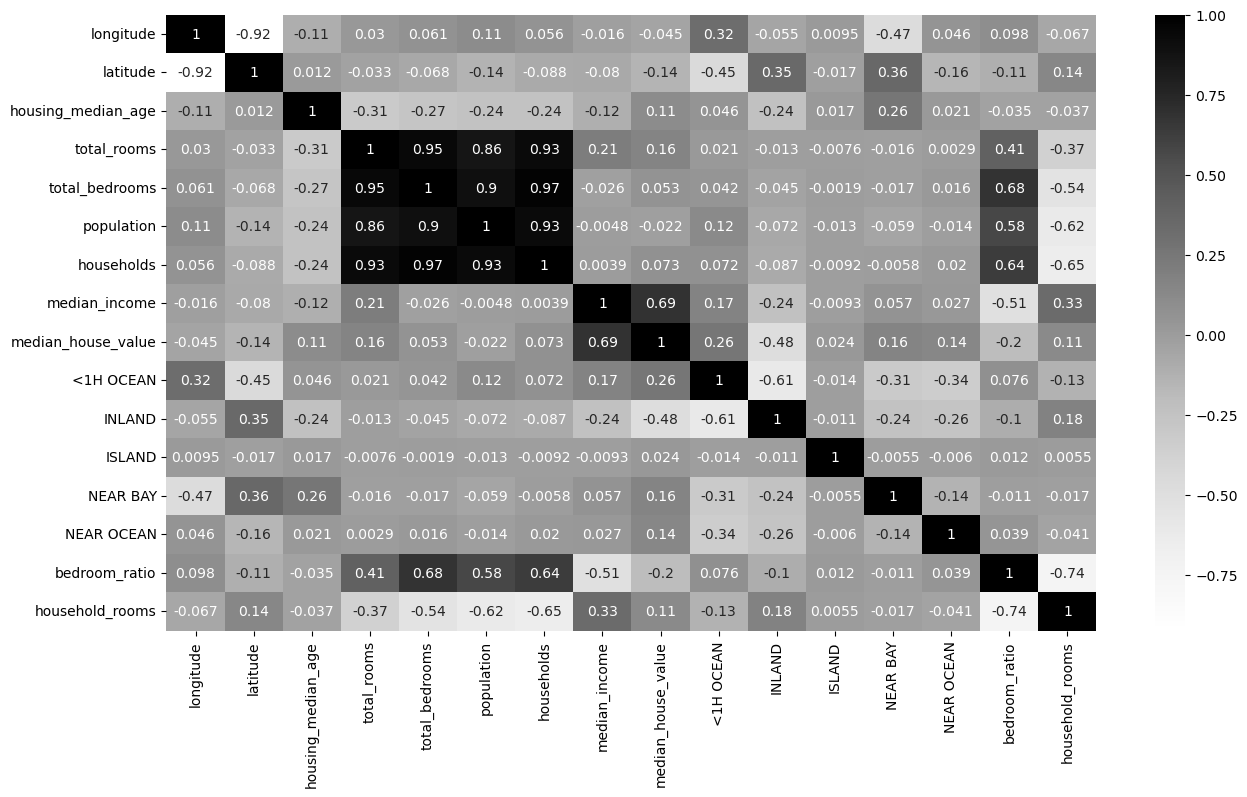

In [149]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), annot=True, cmap="Greys")

In [150]:
x = data.drop('median_house_value', axis=1)
y = data['median_house_value']

In [151]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=100)

In [152]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()

lreg.fit(x_train,y_train)

y_train_pred = lreg.predict(x_train)
y_test_pred = lreg.predict(x_test)

In [153]:
train_score_lr = lreg.score(x_train,y_train) * 100

In [154]:
test_score_lr = lreg.score(x_test,y_test) * 100

In [155]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_s = scaler.fit_transform(x_train)


lreg_s = LinearRegression()

lreg_s.fit(x_train_s,y_train)

y_train_pred_s = lreg.predict(x_train_s)

/Users/shashikala/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [156]:
train_s_score_lr = lreg_s.score(x_train_s,y_train) * 100

In [157]:
from sklearn.ensemble import RandomForestRegressor

randForest = RandomForestRegressor()

randForest.fit(x_train,y_train)

y_train_pred_rf = randForest.predict(x_train)
y_test_pred_rf = randForest.predict(x_test)

In [158]:
train_score_rf = randForest.score(x_train,y_train) * 100

In [159]:
test_score_rf = randForest.score(x_test,y_test) * 100

In [160]:
randForest.fit(x_train_s,y_train)

y_train_pred_rf_s = lreg.predict(x_train_s)

/Users/shashikala/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [161]:
train_s_score_rf = randForest.score(x_train_s,y_train)*100

In [162]:
result = pd.DataFrame((['LinearRegresion', train_score_lr,train_s_score_lr,test_score_lr],['RandomForestRegressor',train_score_rf,train_s_score_rf,test_score_rf]))
result.columns=['Model','Train_score (%)','Scalar_Train_score (%)','Test_score (%)']
result

,Model,Train_score (%),Scalar_Train_score (%),Test_score (%)
0,LinearRegresion,67.373573,67.372465,66.004930
1,RandomForestRegressor,97.443672,97.450539,81.450009
